# NumPy - A Mathematical Toolkit for Python

In the previous section, modules for Python was introduced. In this section, we'll take a much more detailed look at one of the most useful to scientists: NumPy. This module contains numerous routinues and support frameworks for numerical computing. The routinues in it are very carefully tested for correctness and are crafted for speed. Any time you _can_ use something from this package, it's a good idea to.

Python is built for versatility and ease of programming. Unfortunately, it is not built for speed. Over the years Python has gotten faster and faster but there is still a speed penalty compared to classic compiled languages like C, C++, or Fortran.

Enter NumPy: a package of mathematical routines written in C and Fortran and made to work with Python via a "glue" or "shim" layer. This interface is invisible to the programmer. NumPy looks and behaves just like any other Python package. Under the surface, though, lies a very fast and efficient library of algorithms.

## A first glimpse

Let's take a quick look at NumPy and see a few of the things it can do. NumPy is a package, not part of Python proper, so we have to tell Python to load it. It's traditional to import numpy and give it the alias "np" - it's less typing that way, and if you're cutting and pasting code from other sources then it's handy to follow the convention.

In [1]:
import numpy as np

Python, you'll recall, doesn't have an "array" data type. The closest it can come is the "list". Lists are certainly useful, but they aren't all that fast to read and even slower to write to. To make matters worse, a 2-D array is represented by a list of lists. This is great for representing complicated data but it's lousy for doing math.

The critical NumPy data type is the array: "NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use." ([source](https://numpy.org/doc/stable/user/absolute_beginners.html))
The one caveat with NumPy arrays is that all the elements inside an array need to have the same data type (e.g. integer, float, double). In practice this is rarely, if ever, a problem.

Let's make an array of integers:

In [6]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

The array `a` is now a 4x3 array of integers. The `array` method was called with one argument - a Python "list of lists" representation of the array. The dimensions of the array are inferred from the list of lists used to initialize it.

There are other ways to create arrays. Here are two more common methods:

In [3]:
z = np.zeros(3)
z

array([0., 0., 0.])

Notice the decimal points after the zeros. These indicate that we're seeing floating point numbers.

In [4]:
m = np.ones((3,3))
m

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

This one will throw you off if you aren't paying attention. Notice how many parantheses there are... probably more than you expected! What is going on is that the outer parentheses are there to indicate function arguments, just like calling any other functions. The inner parentheses are used to generate a tuple, in this case one with two values, both of which are threes. This tuple can be arbitrarily long:

In [5]:
big_m = np.ones((3,3,3,3))
big_m

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

The output isn't terribly easy to read, but then again representing a four dimensional array on a flat page is challenging at best.

If we ever need to see the dimensions of an array, we can use the `shape()` method. 


In [6]:
print("z:")
print(np.shape(z))
print()
print("m:")
print(np.shape(m))
print()
print("big_m")
print(np.shape(big_m))

z:
(3,)

m:
(3, 3)

big_m
(3, 3, 3, 3)


## Let's do some actual math, shall we?

The trivial example: add a scalar ("a single number") to every element of the matrix:

In [7]:
print(z)
z_plus_three = z + 3
print(z_plus_three)

[0. 0. 0.]
[3. 3. 3.]


You can use any of the Python operators, of course: `+, -, *, /, %, **`...


In [8]:
print (a % 2)

[[1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]]


Comparison operators (like >, <, and so forth) are legitimate operators, so they work too:

In [9]:
print(a)
print()
print(a > 5)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]


## Linear algebra, anyone?

Let's use NumPy to do some basic linear algebra. First, we'll need another module in the NumPy package:

In [7]:
import numpy.linalg as nl

That `import` statement went out to where Python packages are stored and found the "linalg" module of the numpy package. This module was imported into the Python interpreter under the name "nl" (as in "NumPy linear algebra"). Using the "nl" alias saves a lot of typing and even makes the code easier to read.

In [8]:
k = np.array([[1,1,1], [1,1,0], [1,0,0]])
print(k)

kinv = nl.inv(k)
kinv

[[1 1 1]
 [1 1 0]
 [1 0 0]]


array([[ 0.,  0.,  1.],
       [-0.,  1., -1.],
       [ 1., -1., -0.]])

And given a matrix and its inverse, you probably already guessed where this is going:

In [9]:
k @ kinv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Very Simple Visualization

Matrix a:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Matrix product:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


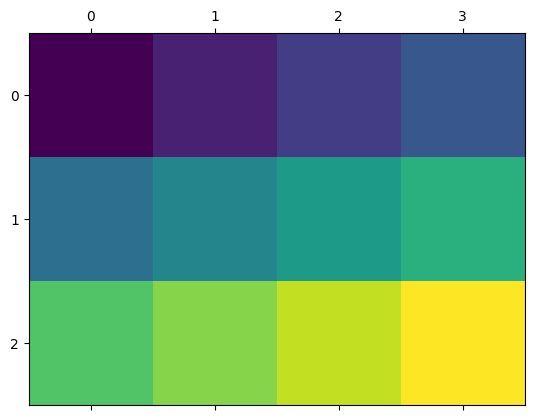

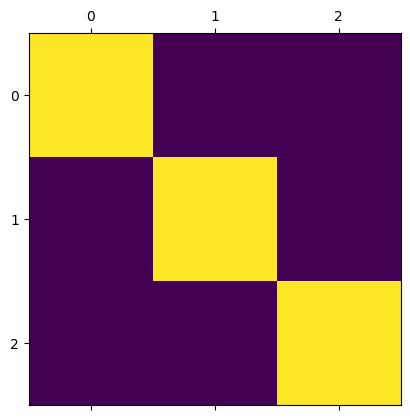

In [14]:
import matplotlib.pyplot as plt
print("Matrix a:")
print(a)
plt.matshow(a)
print()
product=k@kinv
print("Matrix product:")
print(product)
plt.matshow(product)